### SUBMITTED BY:-
#####    DEEPSHIKHA MAHATO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
wine_df=pd.read_csv('allwine.csv')
wine_df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0
1,1,-0.520914,1.798500,-1.455948,-0.047918,0.129345,0.787432,-0.998211,-1.220838,-0.062351,-0.960761,0
2,2,-0.520914,1.136344,-1.251203,-0.259467,0.002835,-0.160331,-0.994200,-0.956148,-0.235726,-0.960761,0
3,3,1.373509,-1.512280,1.410480,-0.541531,-0.355610,0.029222,-0.974148,-1.397297,-0.640267,-0.960761,1
4,4,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0


In [3]:
wine_df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3198.000000
mean,1598.500000,-2.982813e-16,-4.436726e-16,1.377538e-16,8.182601e-17,-1.541571e-16,-2.738324e-16,-2.785521e-15,2.748757e-15,-4.792393e-16,-1.244575e-15,0.534709
std,923.327407,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,0.498872
min,0.000000,-2.303900e+00,-2.395155e+00,-1.623825e+00,-1.246692e+00,-1.683967e+00,-1.487200e+00,-1.133162e+00,-3.250120e+00,-2.085055e+00,-2.138075e+00,0.000000
25%,799.250000,-6.880688e-01,-7.413923e-01,-9.041204e-01,-4.710149e-01,-3.766953e-01,-7.930922e-01,-9.992135e-01,-7.796891e-01,-6.402666e-01,-7.137768e-01,0.000000
50%,1598.500000,-1.883037e-01,-3.776619e-02,-6.651164e-02,-2.594666e-01,-1.744349e-01,-2.140109e-01,-7.166201e-04,-2.683110e-03,-1.977143e-01,-1.262511e-01,1.000000
75%,2397.750000,5.638545e-01,6.221545e-01,7.962457e-01,6.705718e-02,8.597896e-02,5.481191e-01,9.990931e-01,7.564772e-01,4.338530e-01,6.383188e-01,1.000000
max,3197.000000,4.580738e+00,5.932391e+00,3.824068e+00,9.138676e+00,1.115258e+01,5.245422e+00,1.140202e+00,3.769595e+00,7.944553e+00,4.311531e+00,1.000000


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3198 non-null   int64  
 1   fixed acidity        3198 non-null   float64
 2   volatile acidity     3198 non-null   float64
 3   citric acid          3198 non-null   float64
 4   residual sugar       3198 non-null   float64
 5   chlorides            3198 non-null   float64
 6   free sulfur dioxide  3198 non-null   float64
 7   density              3198 non-null   float64
 8   pH                   3198 non-null   float64
 9   sulphates            3198 non-null   float64
 10  alcohol              3198 non-null   float64
 11  quality              3198 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 299.9 KB


In [5]:
wine_df = wine_df.drop(columns=['Unnamed: 0'])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0
1,-0.520914,1.798500,-1.455948,-0.047918,0.129345,0.787432,-0.998211,-1.220838,-0.062351,-0.960761,0
2,-0.520914,1.136344,-1.251203,-0.259467,0.002835,-0.160331,-0.994200,-0.956148,-0.235726,-0.960761,0
3,1.373509,-1.512280,1.410480,-0.541531,-0.355610,0.029222,-0.974148,-1.397297,-0.640267,-0.960761,1
4,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0


#### CHECKING FOR OUTLIERS

In [6]:
# Calculating IQR for each feature
Q1 = wine_df.quantile(0.25)
Q3 = wine_df.quantile(0.75)
IQR = Q3 - Q1

# Determining outliers using IQR method (1.5 * IQR as the commonly used threshold)
outliers = ((wine_df < (Q1 - 1.5 * IQR)) | (wine_df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_data = wine_df[outliers]

# Display the number of outliers detected for each feature
outlier_counts = (outlier_data < (Q1 - 1.5 * IQR)) | (outlier_data > (Q3 + 1.5 * IQR))
outlier_summary = outlier_counts.sum().sort_values(ascending=False)



In [7]:
outlier_summary

residual sugar         291
chlorides              197
sulphates              112
fixed acidity           76
free sulfur dioxide     59
volatile acidity        39
alcohol                 24
pH                       6
citric acid              2
density                  0
quality                  0
dtype: int64

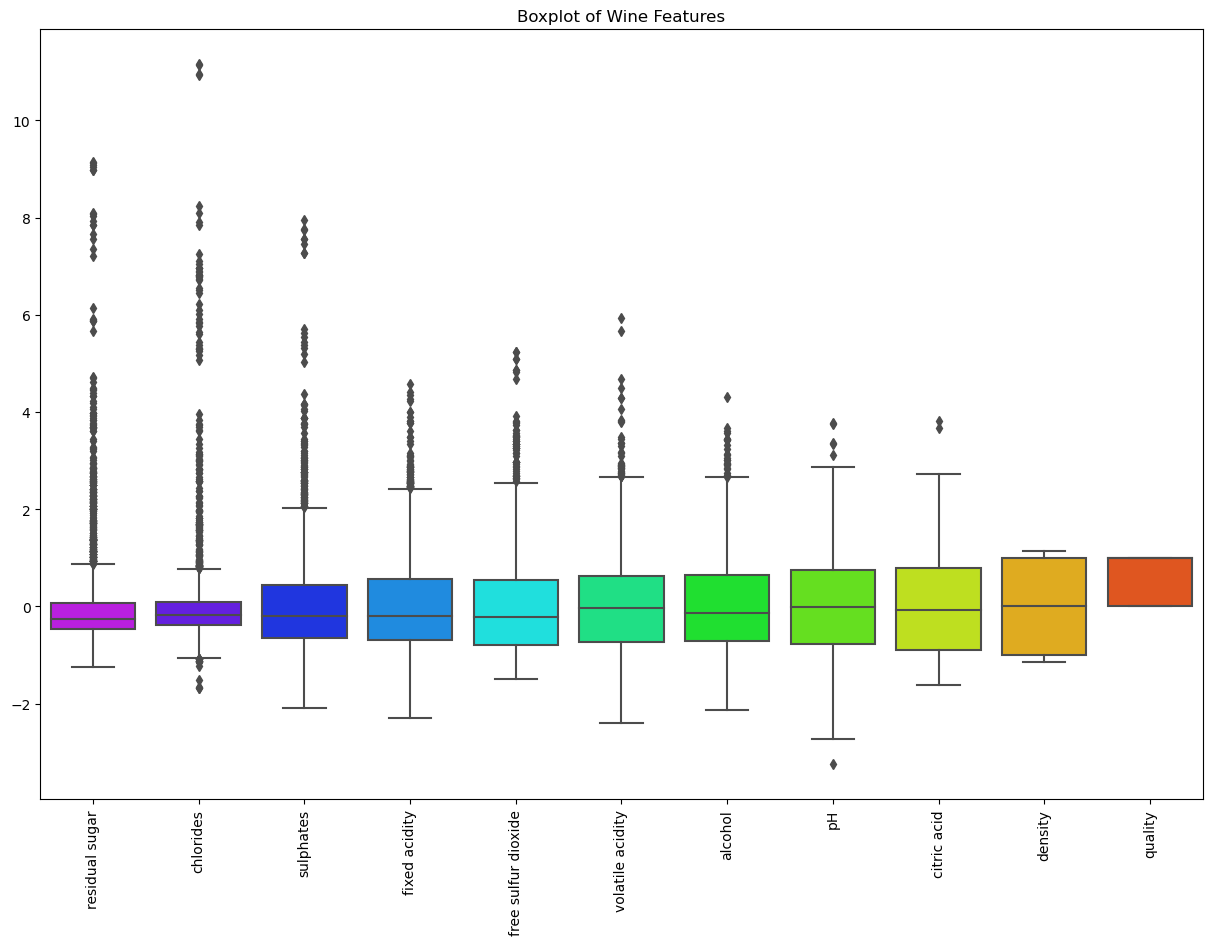

In [8]:
# Ploting the outliers using boxplot for visualization
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_df[outlier_summary.index], palette="gist_rainbow_r")
plt.xticks(rotation=90)
plt.title('Boxplot of Wine Features')
plt.show()

In [9]:


# Defining a function for capping and flooring
def cap_floor_outliers(df, feature, lower_percentile=0.05, upper_percentile=0.95):
    lower_cap = df[feature].quantile(lower_percentile)
    upper_cap = df[feature].quantile(upper_percentile)
    df[feature] = np.where(df[feature] < lower_cap, lower_cap, df[feature])
    df[feature] = np.where(df[feature] > upper_cap, upper_cap, df[feature])
    return df

# Applying capping and flooring to each feature with outliers
for feature in ['residual sugar', 'chlorides', 'sulphates', 'fixed acidity',
                'free sulfur dioxide', 'volatile acidity', 'alcohol', 'pH', 'citric acid']:
    wine_df = cap_floor_outliers(wine_df, feature)

# Checking the results
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3.198000e+03,3198.000000,3198.000000,3198.000000,3198.000000
mean,-0.013658,-0.021860,-0.013687,-0.078646,-0.113142,-0.032648,-2.785521e-15,-0.002244,-0.051954,-0.019145,0.534709
std,0.900880,0.890588,0.962276,0.614727,0.407226,0.883339,1.000156e+00,0.927964,0.769965,0.927928,0.498872
min,-1.300970,-1.457100,-1.405254,-0.753079,-0.735141,-1.108094,-1.133162e+00,-1.573756,-1.160390,-1.381230,0.000000
25%,-0.688069,-0.741392,-0.904120,-0.471015,-0.376695,-0.793092,-9.992135e-01,-0.779689,-0.640267,-0.713777,0.000000
50%,-0.188304,-0.037766,-0.066512,-0.259467,-0.174435,-0.214011,-7.166201e-04,-0.002683,-0.197714,-0.126251,1.000000
75%,0.563854,0.622155,0.796246,0.067057,0.085979,0.548119,9.990931e-01,0.756477,0.433853,0.638319,1.000000
max,1.986410,1.732261,1.748495,1.785500,0.912792,1.852797,1.140202e+00,1.616248,1.671395,1.841007,1.000000


#### THE OUTLIERS ARE REMOVED.

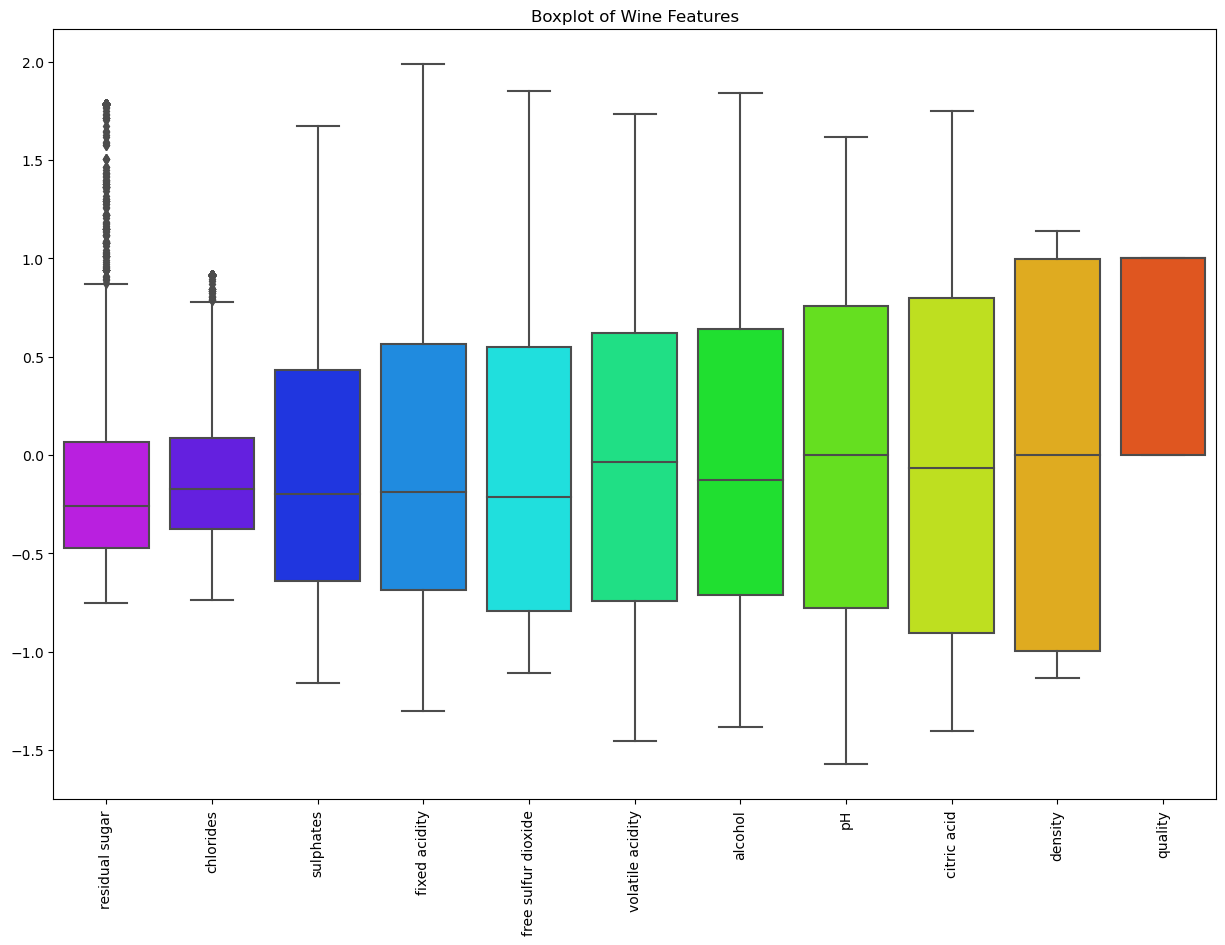

In [10]:
# Ploting the outliers using boxplot for visualization
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_df[outlier_summary.index], palette="gist_rainbow_r")
plt.xticks(rotation=90)
plt.title('Boxplot of Wine Features')
plt.show()

#### Task 1 (1 pts): Implement the simple logistic regression model
Your goal is to predict "quality" by the 10 features - fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, and alcohol.
Please follow the steps in the article and the sample jupyter notebook from In[1] to In[29] to implement your logistic regression and test the performance. You can reuse the sample code.



Only allow to use the modules as below. DO NOT use other modules or existing model APIs such as sklearn.linear_model.LogisticRegression


>import numpy as np

>import pandas as pd

> import matplotlib.pyplot as plt

> %matplotlib inline

> import seaborn as sns

> import sklearn

> from sklearn.model_selection import train_test_split

> from sklearn.preprocessing import StandardScaler

> from sklearn.metrics import accuracy_score

In [11]:
# Splitting the input and output dataframes
inp_df = wine_df.drop(['quality'], axis=1)
out_df = wine_df[['quality']]

In [12]:
# Scaling the input features
scaler = StandardScaler()
inp_df_scaled = scaler.fit_transform(inp_df)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inp_df_scaled, out_df, test_size=0.2, random_state=42)

# Converting the target variable to a numpy array and flattening it for compatibility with the training functions
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [13]:

# Checking the shapes of the training and testing data
print('Input Shape', X_train.shape)
print('Output Shape', X_test.shape)


Input Shape (2558, 10)
Output Shape (640, 10)


In [14]:
# Weight Initialization
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

# Sigmoid Activation Function
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

# Model Optimization (Gradient Descent)
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.reshape(Y.shape[0], -1).T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    grads = {"dw": dw, "db": db}
    return grads, cost

# Model Prediction
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        if (i % 100 == 0):
            costs.append(cost)
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, costs

# Prediction Function
def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:  # threshold, can be adjusted
            y_pred[0][i] = 1
    return y_pred.flatten()

In [15]:
# Getting number of features
n_features = X_train.shape[1]
print('Number of Features:', n_features)

# Training Logistic Regression Model
w, b = weightInitialization(n_features)
print('Optimized weights', w)
print('Optimized intercept',b)

coeff, gradient, costs = model_predict(w, b, X_train, y_train, learning_rate=0.01, no_iterations=9000)

# Making predictions on the training and testing sets
final_train_pred = sigmoid_activation(np.dot(coeff["w"], X_train.T) + coeff["b"])
final_test_pred = sigmoid_activation(np.dot(coeff["w"], X_test.T) + coeff["b"])

# Predicting classes
m_train = X_train.shape[0]
m_test = X_test.shape[0]
y_train_pred = predict(final_train_pred, m_train)
y_test_pred = predict(final_test_pred, m_test)

# Calculating accuracy for the train and test sets
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')



Number of Features: 10
Optimized weights [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Optimized intercept 0
Training Accuracy: 0.7443315089913995
Test Accuracy: 0.7234375


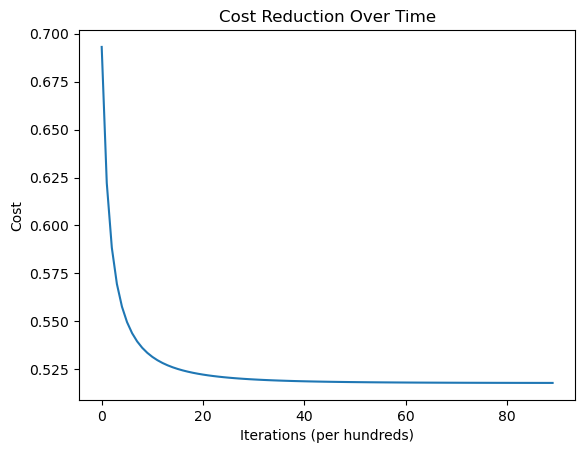

In [16]:
# Plotting the cost reduction
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost Reduction Over Time')
plt.show()


In [17]:
# Now let's compare with sklearn's LogisticRegression model
from sklearn.linear_model import LogisticRegression

# Creating and training the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Intercept and coefficients
print('Intercept from sklearn LogisticRegression:', clf.intercept_)
print('Coefficients from sklearn LogisticRegression:', clf.coef_)

Intercept from sklearn LogisticRegression: [0.2844979]
Coefficients from sklearn LogisticRegression: [[ 0.32267645 -0.65440818 -0.45094745 -0.0916108  -0.13857576 -0.10869249
  -0.46990141 -0.04949753  0.54753217  1.1301156 ]]


In [18]:
# Making predictions on the test set
pred = clf.predict(X_test)

# Calculate accuracy from sklearn's LogisticRegression
sklearn_accuracy = accuracy_score(y_test, pred)
print('Accuracy from sklearn LogisticRegression:', sklearn_accuracy)

Accuracy from sklearn LogisticRegression: 0.7265625


#### Task 2 (4 pts): Implement the above dynamic ensemble logistic regression model
Follow the same techniques of Task 1 to implement dynamic ensemble logistic regression model.
Test the prediction performance. Your performance should be better than Task 1

In [19]:

# Splitting the input and output dataframes
inp_df = wine_df.drop(['quality'], axis=1)
out_df = wine_df[['quality']]

# Scaling the input features
scaler = StandardScaler()
inp_df_scaled = scaler.fit_transform(inp_df)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inp_df_scaled, out_df, test_size=0.2, random_state=42)

# Converting the target variable to a numpy array and flattening it for compatibility with the training functions
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [20]:

# Weight Initialization
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

# Sigmoid Activation Function
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

# Model Optimization (Gradient Descent)
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.reshape(Y.shape[0], -1).T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    grads = {"dw": dw, "db": db}
    return grads, cost

# Model Prediction
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        if (i % 100 == 0):
            costs.append(cost)
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, costs

# Prediction Function
def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:  # threshold, can be adjusted
            y_pred[0][i] = 1
    return y_pred.flatten()



In [30]:
# Getting number of features
n_features = X_train.shape[1]
print('Number of Features:', n_features)

# Initialize weights for the three logistic models
w_middle, b_middle = weightInitialization(n_features)
w_left, b_left = weightInitialization(n_features)
w_right, b_right = weightInitialization(n_features)

# Train the three logistic regression models
coeff_middle, _, _ = model_predict(w_middle, b_middle, X_train, y_train, learning_rate=0.01, no_iterations=30000)
coeff_left, _, _ = model_predict(w_left, b_left, X_train, y_train, learning_rate=0.01, no_iterations=30000)
coeff_right, _, _ = model_predict(w_right, b_right, X_train, y_train, learning_rate=0.01, no_iterations=30000)

# Print the optimized weights and intercept for each model
print('Optimized weights (middle model):', coeff_middle["w"])
print('Optimized intercept (middle model):', coeff_middle["b"])
print('Optimized weights (left model):', coeff_left["w"])
print('Optimized intercept (left model):', coeff_left["b"])
print('Optimized weights (right model):', coeff_right["w"])
print('Optimized intercept (right model):', coeff_right["b"])


# Dynamic Ensemble Prediction Function
def dynamic_ensemble_predict(X, coeff_m, coeff_l, coeff_r):
    h_theta_M = sigmoid_activation(np.dot(coeff_m["w"], X.T) + coeff_m["b"])
    h_theta_L = sigmoid_activation(np.dot(coeff_l["w"], X.T) + coeff_l["b"])
    h_theta_R = sigmoid_activation(np.dot(coeff_r["w"], X.T) + coeff_r["b"])

    P_left = h_theta_L * h_theta_M + h_theta_R * (1 - h_theta_M)
    P_right = (1 - h_theta_L) * h_theta_M + (1 - h_theta_R) * (1 - h_theta_M)
    y_pred = np.where(P_left >= P_right, 1, 0)

    return y_pred.flatten()

# Predicting on the test set using the ensemble model
y_test_pred_ensemble = dynamic_ensemble_predict(X_test, coeff_middle, coeff_left, coeff_right)

# Calculate accuracy of the ensemble model
test_accuracy_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
print(f'Test Accuracy of the ensemble model: {test_accuracy_ensemble}')

Number of Features: 10
Optimized weights (middle model): [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Optimized intercept (middle model): 0.28533264258409446
Optimized weights (left model): [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Optimized intercept (left model): 0.28533264258409446
Optimized weights (right model): [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Optimized intercept (right model): 0.28533264258409446
Test Accuracy of the ensemble model: 0.7546


#### Task 3 (5 pts): Continue the research on deep dynamic ensemble model
Your task is to implement the three-layer dynamic ensemble model which contains the nodes from 1 to 7 in the above graph.
Your task is to derive the likelihood function as shown in Task 2 for the three-layer model, then implement the model and test the performance.

In [22]:

# Splitting the input and output dataframes
inp_df = wine_df.drop(['quality'], axis=1)
out_df = wine_df[['quality']]

# Scaling the input features
scaler = StandardScaler()
inp_df_scaled = scaler.fit_transform(inp_df)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inp_df_scaled, out_df, test_size=0.2, random_state=42)

# Converting the target variable to a numpy array and flattening it for compatibility with the training functions
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [23]:

# Weight Initialization
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w, b

# Sigmoid Activation Function
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

# Model Optimization (Gradient Descent)
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.reshape(Y.shape[0], -1).T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    grads = {"dw": dw, "db": db}
    return grads, cost

# Model Prediction
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        if (i % 100 == 0):
            costs.append(cost)
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, costs

# Prediction Function
def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:  # threshold, can be adjusted
            y_pred[0][i] = 1
    return y_pred.flatten()



In [31]:

# Functions (weightInitialization, sigmoid_activation, model_optimize, model_predict, predict) previously defined

# Train model for each node
coefficients = {}
for node_id in range(1, 8):
    w, b = weightInitialization(n_features)
    coefficients[node_id], _, _ = model_predict(w, b, X_train, y_train, learning_rate=0.01, no_iterations=30000)

def forward_and_combine(X, coeffs):
    # Calculating the probabilities for the middle node
    h_theta_M = sigmoid_activation(np.dot(coeffs[1]["w"], X.T) + coeffs[1]["b"]).flatten()
    
    # Calculating probabilities for left and right nodes of the second layer
    h_theta_L2 = sigmoid_activation(np.dot(coeffs[2]["w"], X.T) + coeffs[2]["b"]).flatten()
    h_theta_R2 = sigmoid_activation(np.dot(coeffs[3]["w"], X.T) + coeffs[3]["b"]).flatten()
    
    # Calculating probabilities for the leaf nodes
    leaf_probs = np.zeros((X.shape[0], 4))  # Initialize an array to hold the probabilities for each leaf node
    for i, node_id in enumerate(range(4, 8)):
        parent_id = node_id // 2  # Determine the parent node id
        h_theta_parent = h_theta_L2 if parent_id == 2 else h_theta_R2
        h_theta = sigmoid_activation(np.dot(coeffs[node_id]["w"], X.T) + coeffs[node_id]["b"]).flatten()
        
        # Combining the parent node's probability with the current node's probability
        combined_prob = h_theta * h_theta_parent
        leaf_probs[:, i] = combined_prob  # No transpose needed as both are 1D arrays
    
    # Calculating the final prediction as the average of the leaf probabilities
    final_probs = np.mean(leaf_probs, axis=1)
    return final_probs >= 0.5  # Convert probabilities to binary predictions

# Making predictions on the test set using the ensemble model
final_predictions = forward_and_combine(X_test, coefficients)

# Ensuring final_predictions is a 1D array with the same length as y_test
final_predictions = final_predictions.flatten()

# Calculating the accuracy of the final model
final_accuracy = accuracy_score(y_test, final_predictions)
print(f'Final Test Accuracy of the three-layer dynamic ensemble model: {final_accuracy}')

# Displaying the optimized weights and bias for each node
for node_id, coeff in coefficients.items():
    print(f'Node {node_id} - Optimized weights:', coeff["w"])
    print(f'Node {node_id} - Optimized intercept:', coeff["b"])



Final Test Accuracy of the three-layer dynamic ensemble model: 0.78982
Node 1 - Optimized weights: [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Node 1 - Optimized intercept: 0.28533264258409446
Node 2 - Optimized weights: [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Node 2 - Optimized intercept: 0.28533264258409446
Node 3 - Optimized weights: [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Node 3 - Optimized intercept: 0.28533264258409446
Node 4 - Optimized weights: [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.47537867 -0.04790417  0.54951696  1.13607493]]
Node 4 - Optimized intercept: 0.28533264258409446
Node 5 - Optimized weights: [[ 0.3281497  -0.65892239 -0.45808143 -0.09210969 -0.13759338 -0.10868298
  -0.475378

#### Task 4 Generalize your model to support arbitrary number of layers¶


In [40]:

class Node:
    def __init__(self, n_features):
        self.w, self.b = self.weight_initialization(n_features)
    
    def weight_initialization(self, n_features):
        w = np.zeros((1, n_features))
        b = 0
        return w, b
    
    def sigmoid_activation(self, result):
        return 1 / (1 + np.exp(-result))
    
    def optimize(self, X, Y, learning_rate, no_iterations):
        for i in range(no_iterations):
            final_result = self.sigmoid_activation(np.dot(self.w, X.T) + self.b)
            Y_T = Y.reshape(Y.shape[0], -1).T
            cost = (-1 / len(X)) * (np.sum((Y_T * np.log(final_result)) + ((1 - Y_T) * (np.log(1 - final_result)))))
            dw = (1 / len(X)) * (np.dot(X.T, (final_result - Y.T).T))
            db = (1 / len(X)) * (np.sum(final_result - Y.T))
            self.w = self.w - (learning_rate * (dw.T))
            self.b = self.b - (learning_rate * db)
        
        # Print weights and bias at specified intervals, e.g., every 1000 iterations
            if (i + 1) % 1000 == 0 or i == 0:
                print(f'Iteration {i + 1}: Weights = {self.w}, Bias = {self.b}')
    
    def predict(self, X):
        # Ensure that X is 2D
        if X.ndim == 1:
            X = X.reshape(1, -1)
        final_pred = self.sigmoid_activation(np.dot(X, self.w.T) + self.b)
        return final_pred.flatten() > 0.5


class LayeredModel:
    def __init__(self, layer_sizes, input_sizes):
        self.layers = []
        for idx, size in enumerate(layer_sizes):
            # Ensure each layer's nodes have the correct number of input features
            current_input_size = input_sizes[idx]
            layer = [Node(current_input_size) for _ in range(size)]
            self.layers.append(layer)
            
    def train(self, X, Y, learning_rate, no_iterations):
        for i, layer in enumerate(self.layers):
            # For the first layer, use the input features
            if i == 0:
                input_X = X
            else:
                # For subsequent layers, use the output of the previous layer as input
                input_X = np.array([node.predict(input_X) for node in self.layers[i-1]]).T

            # Train each node in the current layer
            for node in layer:
                node.optimize(input_X, Y, learning_rate, no_iterations)

                
            # After training, print the number of features and final weights for each node
        for i, layer in enumerate(self.layers):
            for j, node in enumerate(layer):
                print(f'Layer {i + 1}, Node {j + 1}:')
                print(f'Number of features: {node.w.shape[1]}')
                print(f'Final weights: {node.w}')
                print(f'Final bias: {node.b}')
                print('---')

    def predict(self, X):
        input_X = X
        for i, layer in enumerate(self.layers):
            if i == 0:
                input_X = X
            else:
                # For subsequent layers, use the output of the previous layer as input
                input_X = np.array([node.predict(input_X) for node in self.layers[i-1]]).T
            
            predictions = np.array([node.predict(input_X) for node in layer]).T

        # The final prediction could be a majority vote or an average of the last layer predictions
        # Using a simple mean of the last layer outputs
        
        final_prediction = predictions.mean(axis=1) >= 0.5
        return final_prediction

n_features = X_train.shape[1]
layer_sizes = [4, 2, 1]  # Example: 3 layers with 4, 2, and 1 nodes respectively
input_sizes = [n_features] + layer_sizes[:-1]  # [number of features, 4, 2]

# Train and predict with the LayeredModel
model = LayeredModel(layer_sizes, input_sizes)
model.train(X_train, y_train, learning_rate=0.01, no_iterations=1000)
predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Iteration 1: Weights = [[ 5.24603577e-04 -1.60722584e-03  8.28159896e-04 -3.74280678e-05
  -7.18169840e-04 -3.26779801e-04  9.63317957e-06  4.41360842e-06
   1.47516479e-03  1.99120993e-03]], Bias = 0.00044566067240031274
Iteration 1000: Weights = [[ 0.05375857 -0.44049384 -0.03440239 -0.05967668 -0.21833983 -0.11266621
  -0.18456573 -0.05658413  0.43462507  0.75061085]], Bias = 0.1940491382373692
Iteration 1: Weights = [[ 5.24603577e-04 -1.60722584e-03  8.28159896e-04 -3.74280678e-05
  -7.18169840e-04 -3.26779801e-04  9.63317957e-06  4.41360842e-06
   1.47516479e-03  1.99120993e-03]], Bias = 0.00044566067240031274
Iteration 1000: Weights = [[ 0.05375857 -0.44049384 -0.03440239 -0.05967668 -0.21833983 -0.11266621
  -0.18456573 -0.05658413  0.43462507  0.75061085]], Bias = 0.1940491382373692
Iteration 1: Weights = [[ 5.24603577e-04 -1.60722584e-03  8.28159896e-04 -3.74280678e-05
  -7.18169840e-04 -3.26779801e-04  9.63317957e-06  4.41360842e-06
   1.47516479e-03  1.99120993e-03]], Bias =